

# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



This analyis is about TMDB movies. The dataset was gotten from kaggle, we have conducted some analysis and posed some questions from the dataset. I'm a big fan of movies, that's the big reason why I decided to use TMDB dataset to analyze some of my favourite movies and see how they performed.  Some of the questions include:
<li> What are the most expensive movies?
<li> Which movies have the highest profit?
<li> What year generated the hihest revenue?

Firstly, we import few python packages to investigate the dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.budget_adj.max(), df.budget_adj.min()

(425000000.0, 0.0)

In [8]:
df.budget_adj[0]

137999939.280026

In [9]:
df.budget[0]

150000000

Check for missing values


In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Check for maximum and minimum amount of Budget

In [11]:
df.budget.max(), df.budget.min()

(425000000, 0)

In [12]:
df.budget_adj.max(), df.budget_adj.min()

(425000000.0, 0.0)

Check for maximum and minimum amount of Revenue

In [13]:
df.revenue.max(), df.revenue.min()

(2781505847, 0)

In [14]:
df.revenue_adj.max(), df.revenue_adj.min()

(2827123750.41189, 0.0)

Check for duplicates


In [15]:
df.duplicated().sum()

1

From the above insights, the data is consisting of 10866 enties or movies and 21 attributes between (float, int and object/string), and there is some data values that is null value needed to be droped from the dataframe as well as a mistake entries such as zero budget/revenue value which is not real. Another note is that there are some columns we have no need of it in our analysis and its presence or absence doesn't affect our calculations such is ['homepage', 'overview', 'runtime','release_date', 'tagline', 'keywords'], so will drop it totaly from the dataframe. There is also one duplicate in the dataset, we can drop it since it won't affect our analysis



### Data Cleaning 

Drop columns that are not needed

In [16]:
df_movies = df.copy()

In [17]:
df_movies.drop(['homepage', 'overview', 'runtime', 'release_date', 'tagline', 'keywords', 'imdb_id'], axis=1, inplace=True)

In [18]:
df_movies.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Drop all rows with missing values

In [19]:
df_movies.dropna(inplace=True)


In [20]:
df_movies.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [21]:
df_movies.shape

(9773, 14)

Drop duplicates

In [22]:
df_movies.drop_duplicates(inplace=True)

Drop rows with zero budget and reveneue

In [23]:
df_movies.drop(df_movies.query('revenue == 0' or 'budget == 0' or 'revenue_adj == 0' or 'budget_adj == 0').index, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis




### Let's explore Budget

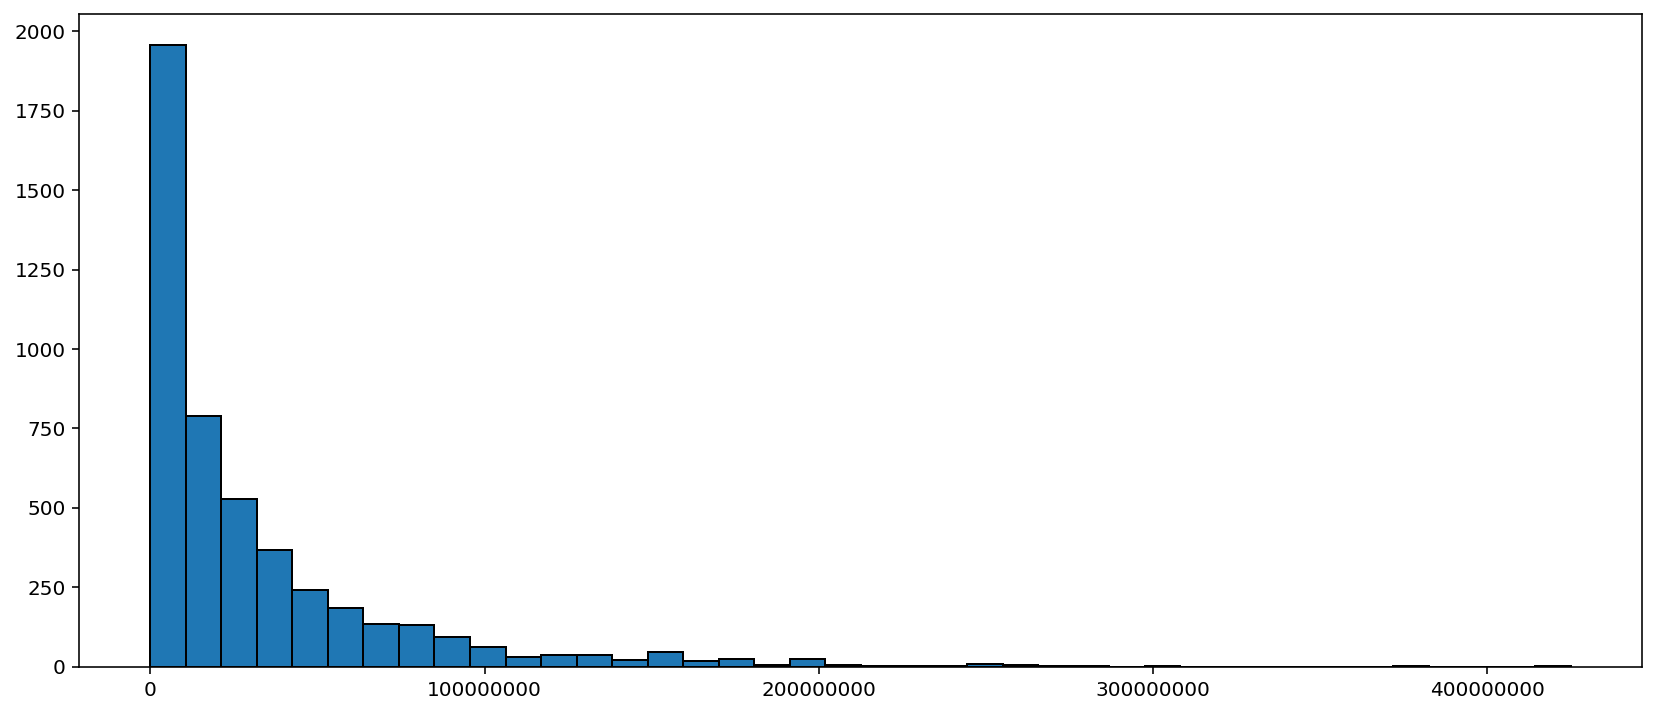

In [35]:
#Let's explore budget
df_movies['budget'].hist(grid=False, bins=40, edgecolor='black', figsize=[14,6]);
#change scientific notation for tick lables
plt.ticklabel_format(style='plain', axis='x')

The budget is right skewed distribution. Most budget are under 100m but there are some movies that cost more than 200m


### What are the most expensive movies?

In [36]:
#function to plot visualization

def my_sort_plot(df, sortVar, top=10):
    """This function is to plot the sorted values of the top 10 columns """

    #plot
    df.sort_values(by=sortVar, ascending=False).set_index('original_title')[sortVar].head(top).plot.barh(edgecolor='black', figsize=[14,6], rot=0, width=0.8);

    #After plotting, tidy up labels
    sortVar = sortVar.replace('_', ' ') #replace _ with a space

    #Add title and format it
    plt.title(f'top {top} movies sorted by {sortVar}'.title(), fontsize = 14, weight = 'bold')
    
    #Add x label and format it
    plt.xlabel(sortVar.title(), fontsize = 10, weight = 'bold')

    #Add y label and format it
    plt.ylabel('Movie Titles'.title(), fontsize=10, weight='bold')

    #change scientific notation for tick lables
    plt.ticklabel_format(style='plain', axis='x')

    #invert y axis
    plt.gca().invert_yaxis();

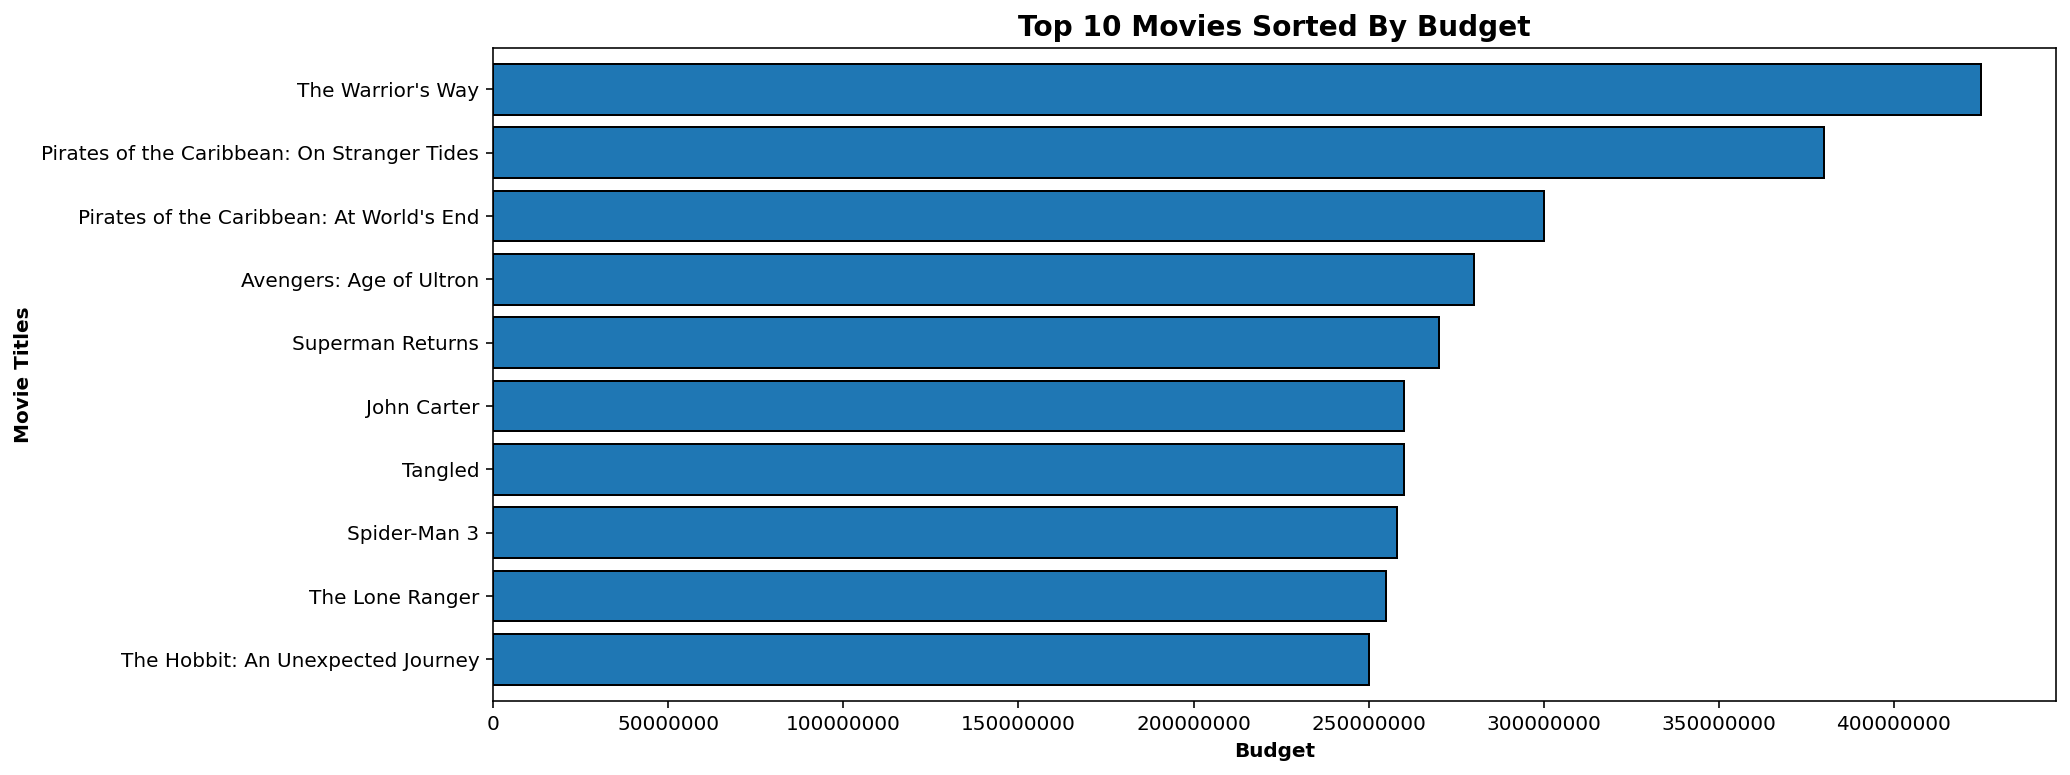

In [37]:
#call plot function
my_sort_plot(df_movies,'budget')

The plot above give us a visualization of the most expensive movies, which is:
 The Warrior's Way

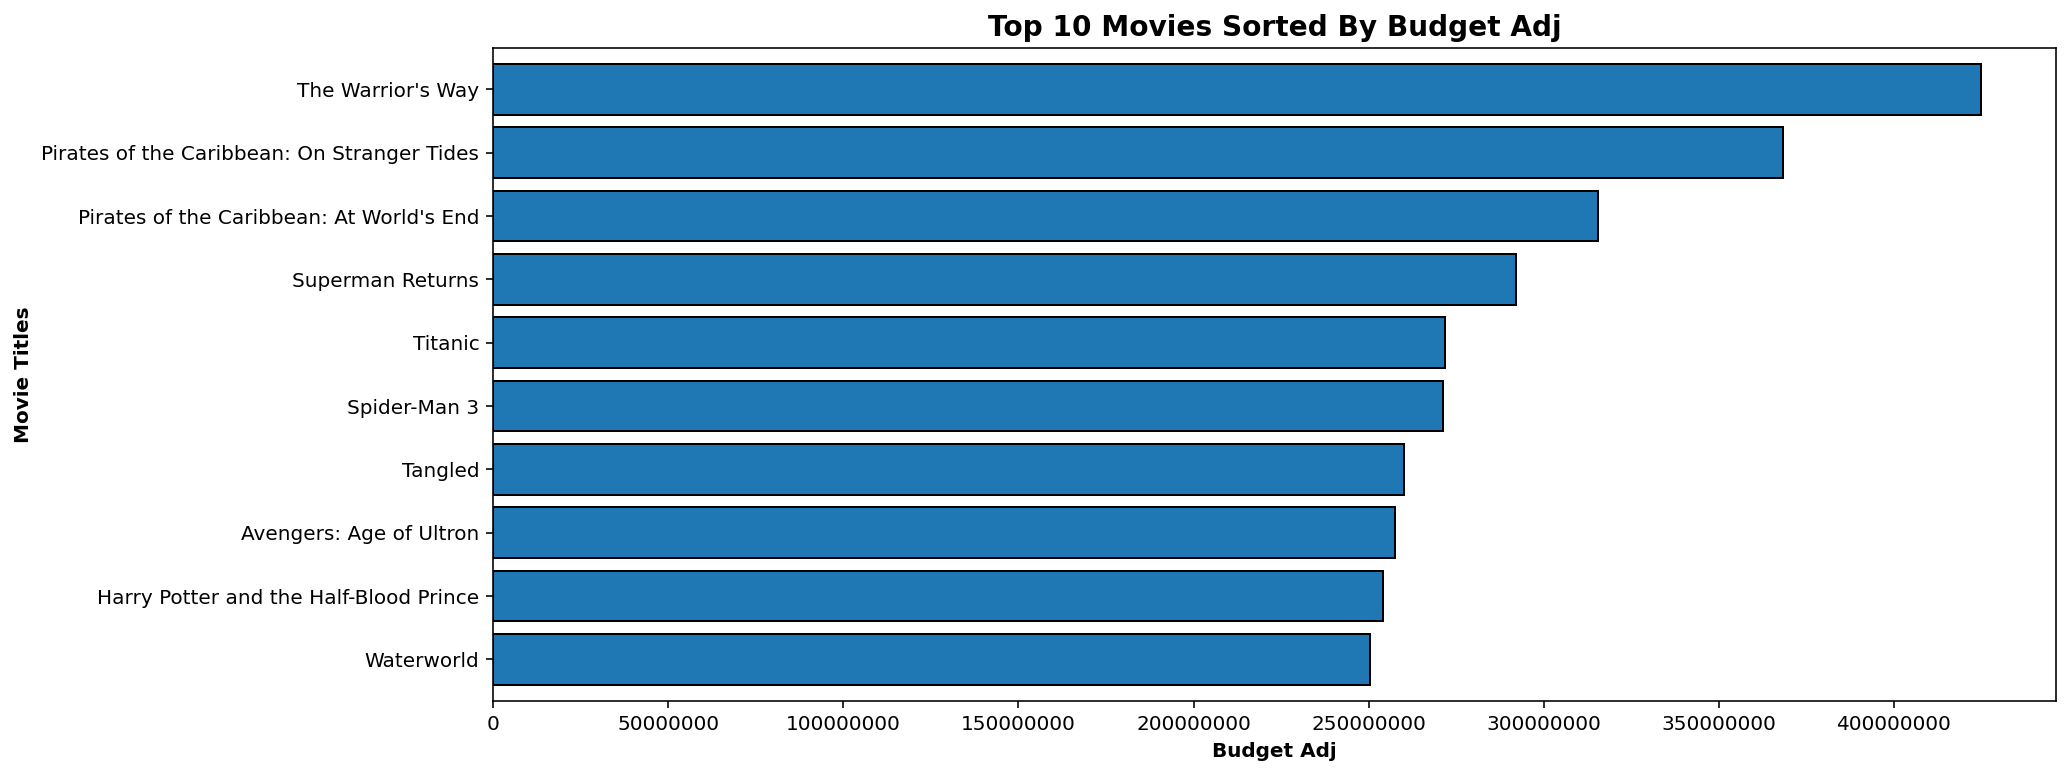

In [38]:
#call plot function
my_sort_plot(df_movies,'budget_adj')

The plot above is the visualization of the most expensive movies with budget adjusted for inflation, the most expensive is The Warrior's Way

### Which movies have highest Profit?


In [29]:
df_movies['profit'] = df_movies['revenue'] - df_movies['budget']

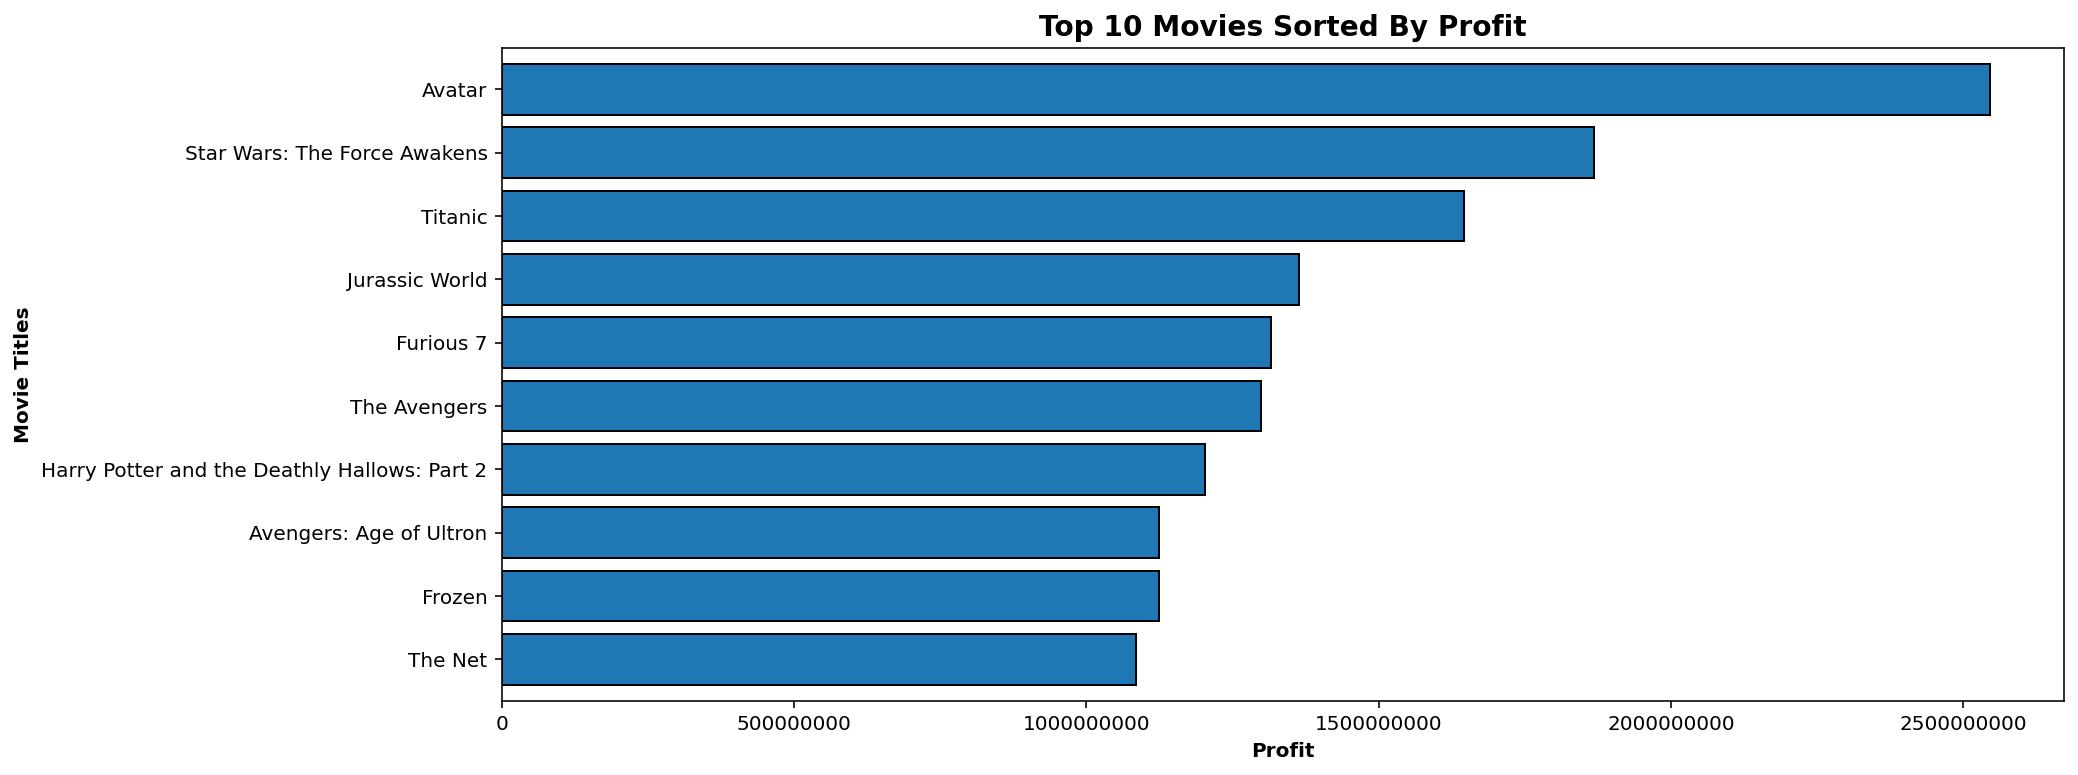

In [39]:
#call plot function
my_sort_plot(df_movies,'profit')

The plot above give us the highest movies profit which is "Avatar"

In [32]:
df_movies['profit_adj'] = df_movies['revenue_adj'] - df_movies['budget_adj']

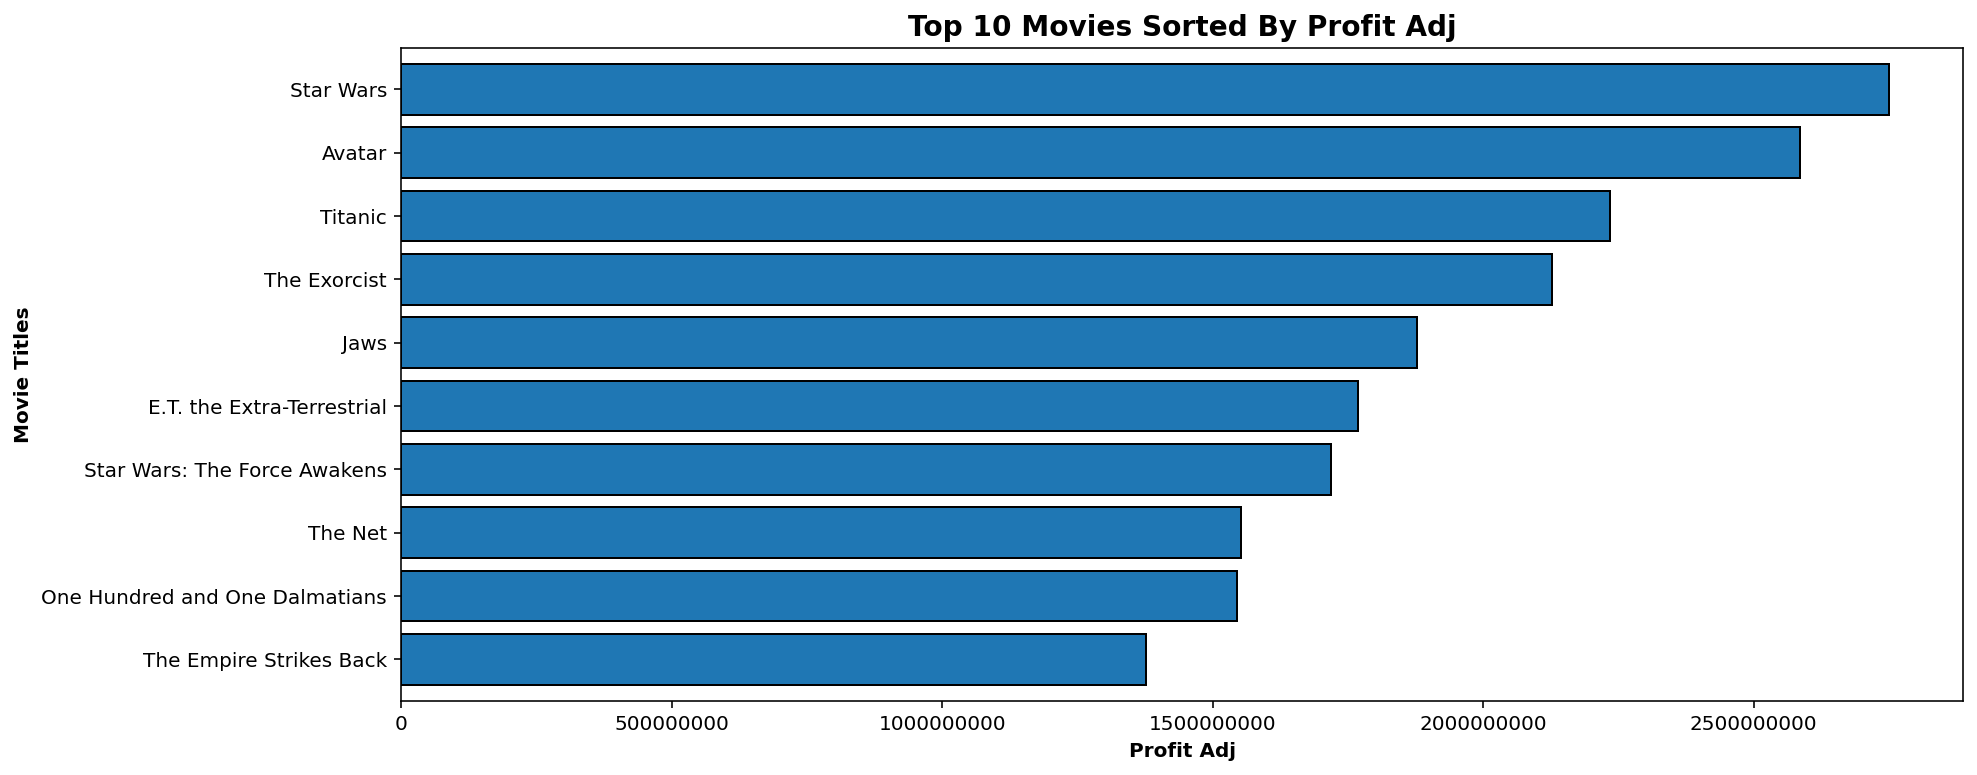

In [40]:
#call plot function
my_sort_plot(df_movies,'profit_adj')

With the adjusted profit value for inflation, the plot above give us visualization of the highest movie profit which is "Star Wars".

## What Year generates the highest Revenue?


In [89]:
df_movies.groupby('release_year').sum()['revenue']

release_year
1960      145005000
1961      337720188
1962      215579846
1963      187404989
1964      340981782
1965      458081854
1966       84736689
1967      737834637
1968      264732980
1969      243957076
1970      560221969
1971      404910610
1972      494730171
1973     1223981102
1974      812539818
1975      957489966
1976      801005600
1977     2180583159
1978     1353386659
1979     1684794913
1980     1768662387
1981     1774606236
1982     2458443852
1983     2307529320
1984     2635524418
1985     2875772392
1986     2998067061
1987     3462104847
1988     3738961360
1989     5164923718
1990     5304688679
1991     4706599796
1992     6078153217
1993     6952183499
1994     7091078403
1995     9147263541
1996     8303862070
1997    10654899590
1998     9483866799
1999    11355712579
2000    10919020206
2001    13359768166
2002    14616242508
2003    15129121970
2004    16747471351
2005    16505301325
2006    16251498200
2007    19403749169
2008    19298965733
2009   

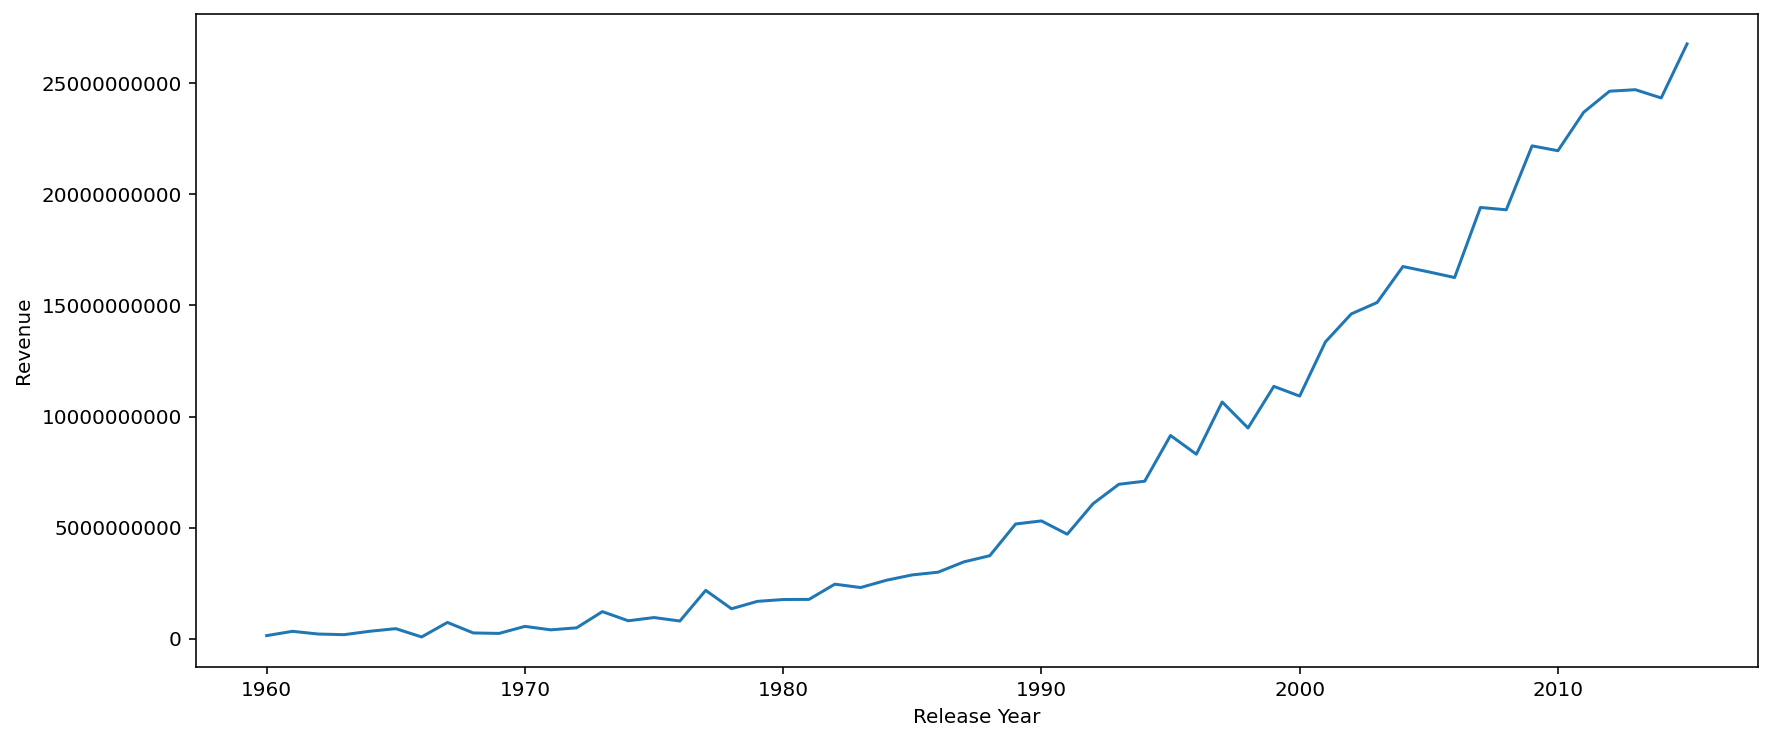

In [47]:
df_movies.groupby('release_year').sum()['revenue'].plot(kind='line', xlabel='Release Year', ylabel='Revenue', figsize=[14,6])
plt.ticklabel_format(style='plain', axis='y')

The Year that generated the most revenue is 2015

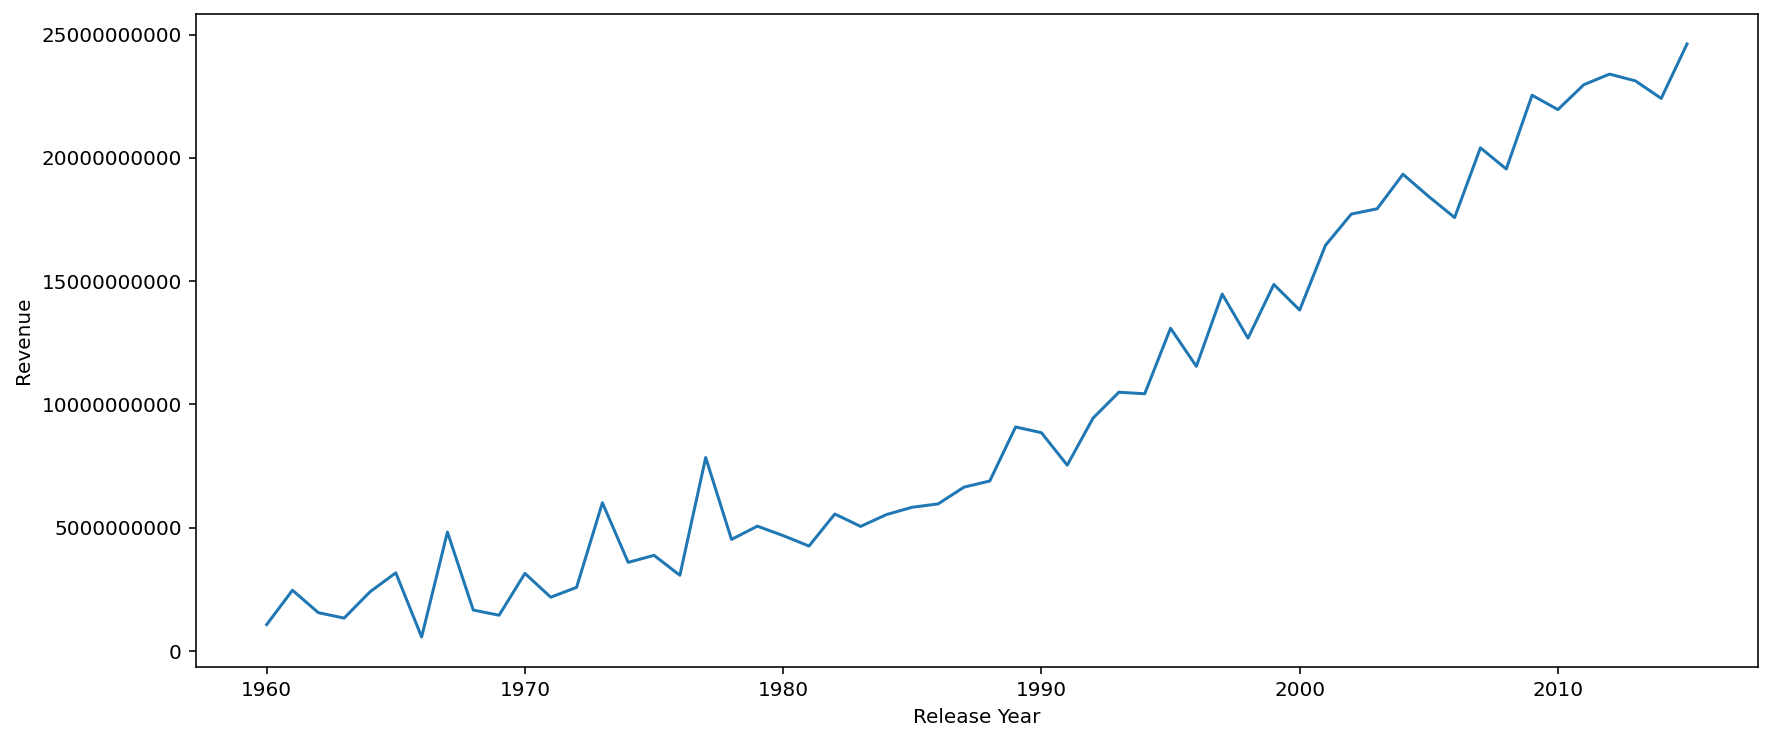

In [46]:
df_movies.groupby('release_year').sum()['revenue_adj'].plot(kind='line', xlabel='Release Year', ylabel='Revenue',figsize=[14,6])
plt.ticklabel_format(style='plain', axis='y')

For adjusted revenue value for inflation, the Year that generated the most Revenue is 2015


## Is there Correlation between Budget and Revenue?

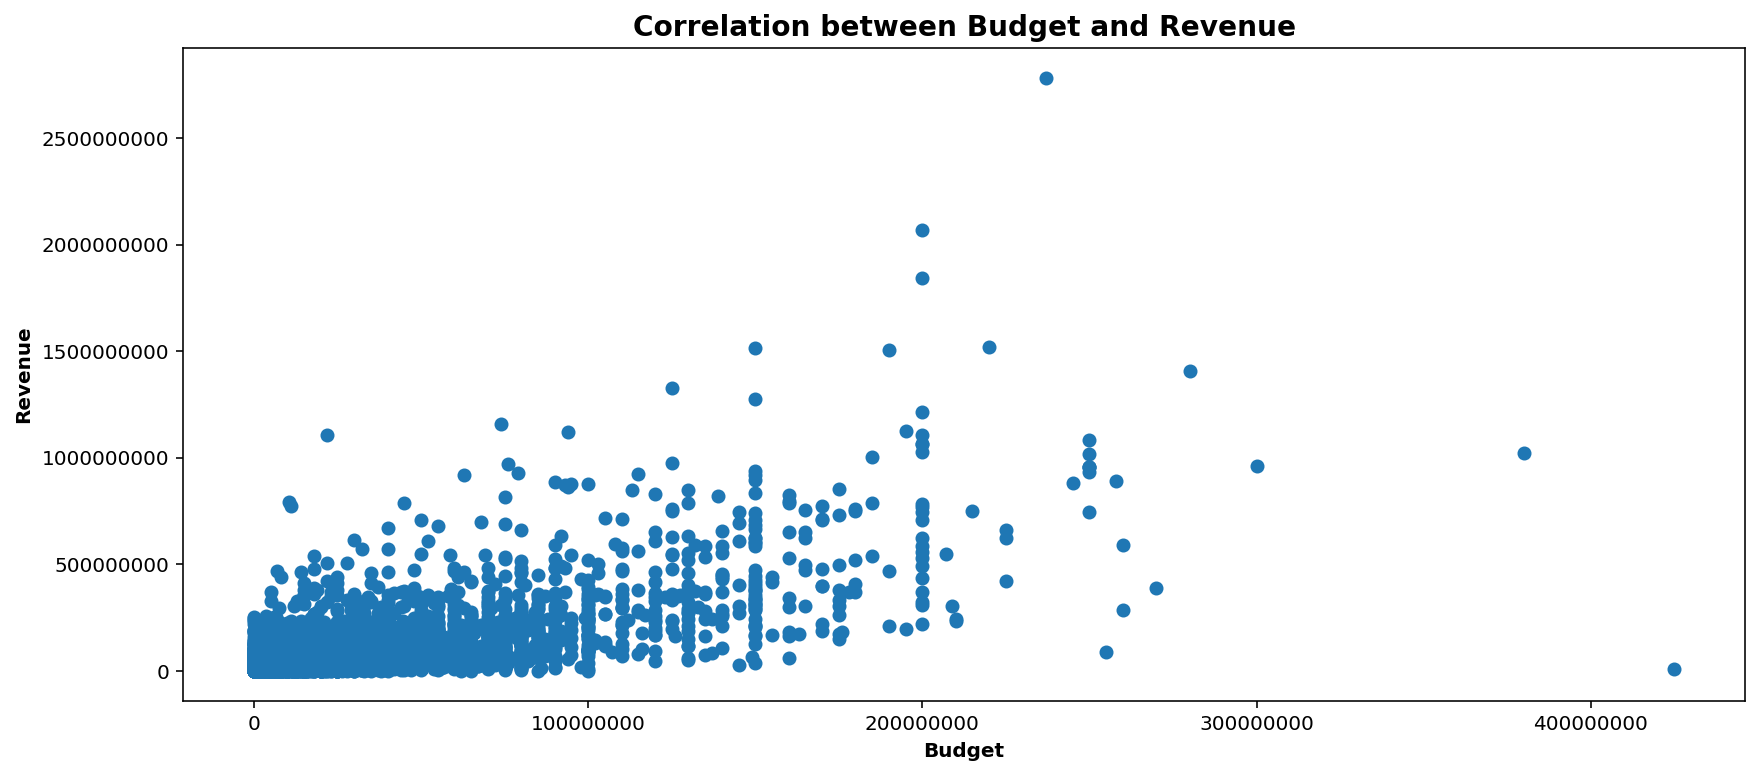

In [56]:
plt.figure(figsize=(14,6))
plt.scatter(df_movies['budget'],df_movies['revenue'])
#set title
plt.title('Correlation between Budget and Revenue', fontsize=14, weight='bold')
#set xlabel
plt.xlabel('Budget', fontsize=10, weight='bold')
#set ylabel
plt.ylabel('Revenue', fontsize=10, weight='bold')
 #change scientific notation for tick lables
plt.ticklabel_format(style='plain', axis='both')

There is a Positive Correlation between Budget and Revenue

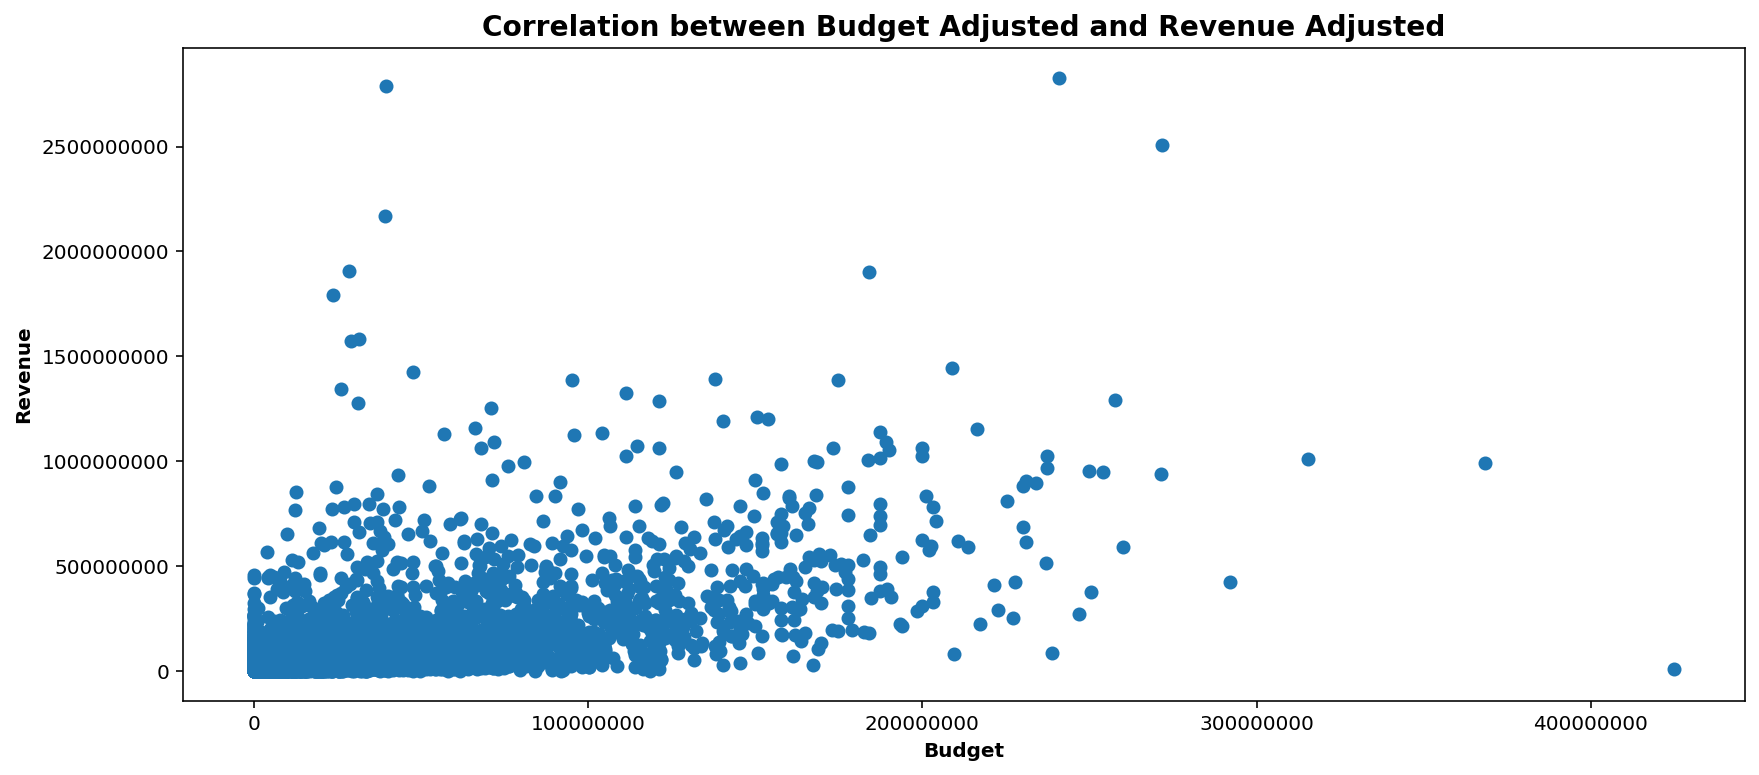

In [57]:
plt.figure(figsize=(14,6))
plt.scatter(df_movies['budget_adj'],df_movies['revenue_adj'])
#set title
plt.title('Correlation between Budget Adjusted and Revenue Adjusted', fontsize=14, weight='bold')
#set xlabel
plt.xlabel('Budget', fontsize=10, weight='bold')
#set ylabel
plt.ylabel('Revenue', fontsize=10, weight='bold')
 #change scientific notation for tick lables
plt.ticklabel_format(style='plain', axis='both')

For adjusted budget and reveneu value for inflation, there is a Positive Correlation between Budget and Revenue

<a id='conclusions'></a>
## Conclusions



I analyzed this dataset and found some amazing insights about the data. I found out what movies were expensive to make and what movies generated the most revenues and what year generated the most revenue. I also noticed that when using the adjusted value of budget and revenue, the analysis differs from using the normal value. The visualization was created to answer some of the questions we asked. I notices that the higher the budget the higher the revenue, that means movies with higher budget tend to perform well in revenue than those with lower budget which makes perfect sense. And also as year is increasing revenue is also increasing, makes sense because technology is advancing and people have more access to movies unlike before with the help of streaming services and cinemas easily available in all countries.

**Limitations** <br>
 <li>In budget and revenue columns, there are many 0s value. <br>
 <li>I dropped some rows which maybe will affect the insights of the dataset.
 <li>We don't know if the value of budget and revenue is in US Dollars.

 <br>After the analysis and wrangling and exploratory data analysis, we can summarised the insights of the dataset into the following:
 <li> The most expensive movie is The Warrior's Way
 <li> The most profitable Movie is Avatar and when using the adjusted value, the most profitable is Star Wars
 <li> The Year that generated the highest profit is 2015.
 <li> The correlation between budget and revenue is skewed to the right which means the higher the budget, the higher the revenue